# Logistic Regression

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
dta = sm.datasets.fair.load_pandas().data
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [8]:
dta["affair"] = (dta.affairs > 0).astype(int)
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


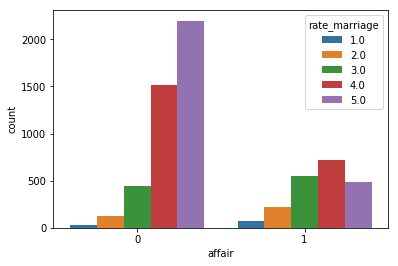

In [9]:
sns.countplot(dta["affair"], hue= dta["rate_marriage"])

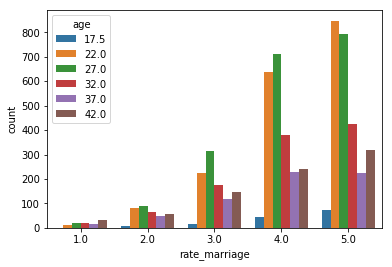

In [11]:
sns.countplot(dta["rate_marriage"], hue=dta["age"])

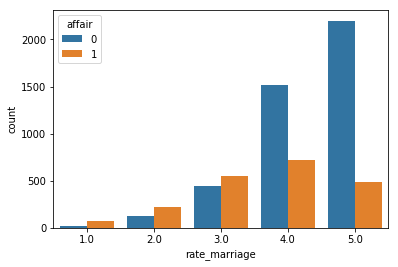

In [12]:
sns.countplot(dta.rate_marriage , hue = dta.affair)

In [16]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ +C(occupation) + C(occupation_husb)',
                 dta, return_type="dataframe")
print(X.columns)

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


In [17]:
X = X.rename(columns ={'C(occupation)[T.2.0]':'occ_2',
                       'C(occupation)[T.3.0]':'occ_3',
                       'C(occupation)[T.4.0]':'occ_4',
                       'C(occupation)[T.5.0]':'occ_5',
                       'C(occupation)[T.6.0]':'occ_6',
                       'C(occupation_husb)[T.2.0]':'occ_husb_2',
                       'C(occupation_husb)[T.3.0]':'occ_husb_3',
                       'C(occupation_husb)[T.4.0]':'occ_husb_4',
                       'C(occupation_husb)[T.5.0]':'occ_husb_5',
                       'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [18]:
y = np.ravel(y)
y

array([1., 1., 1., ..., 0., 0., 0.])

In [19]:
model = LogisticRegression()
model = model.fit(X,y)

model.score(X,y)

c:\users\vagrant\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7258875274897895

In [20]:
y.mean()

0.3224945020420987

In [22]:
model.coef_

array([[ 1.4927585 ,  0.18750313,  0.49883415,  0.25097224,  0.83911061,
         0.8352487 ,  0.18810312,  0.29482577,  0.15878897,  0.18515583,
         0.19119731, -0.70325776, -0.05845109,  0.10570566,  0.01692339,
        -0.37120128,  0.00388539]])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

c:\users\vagrant\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
predicted = model2.predict(X_test)
print(predicted)

[1. 0. 0. ... 0. 0. 0.]


In [25]:
probs = model.predict_proba(X_test)
print(probs)

[[0.34300164 0.65699836]
 [0.90813562 0.09186438]
 [0.7384734  0.2615266 ]
 ...
 [0.58008813 0.41991187]
 [0.82211105 0.17788895]
 [0.75524918 0.24475082]]


In [26]:
print(metrics.accuracy_score(y_test, predicted))

0.7298429319371728


In [27]:
print(metrics.confusion_matrix(y_test, predicted))

[[1169  134]
 [ 382  225]]


In [28]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1303
         1.0       0.63      0.37      0.47       607

   micro avg       0.73      0.73      0.73      1910
   macro avg       0.69      0.63      0.64      1910
weighted avg       0.71      0.73      0.71      1910

